# TASK #1: PROJECT OVERVIEW

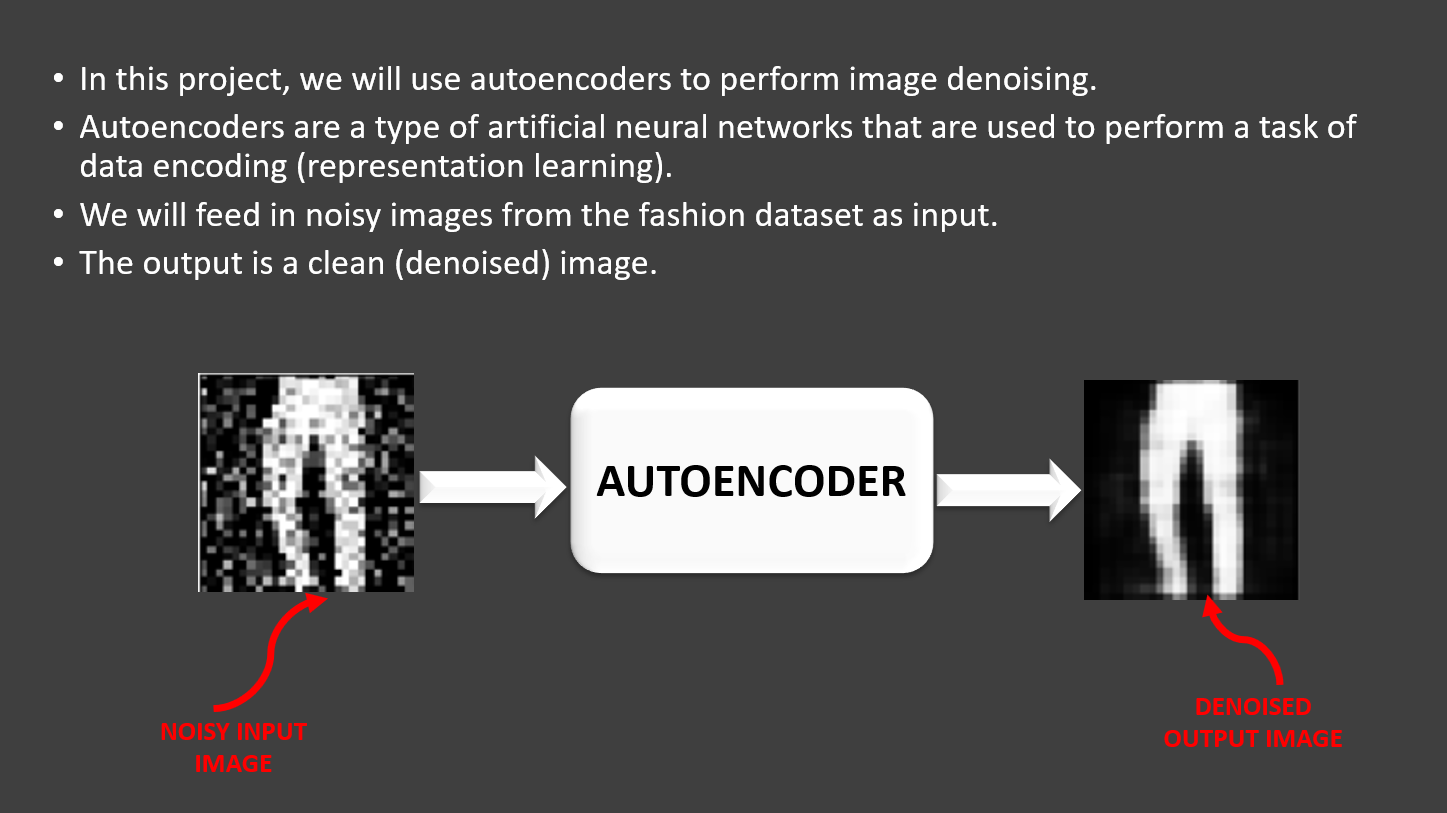

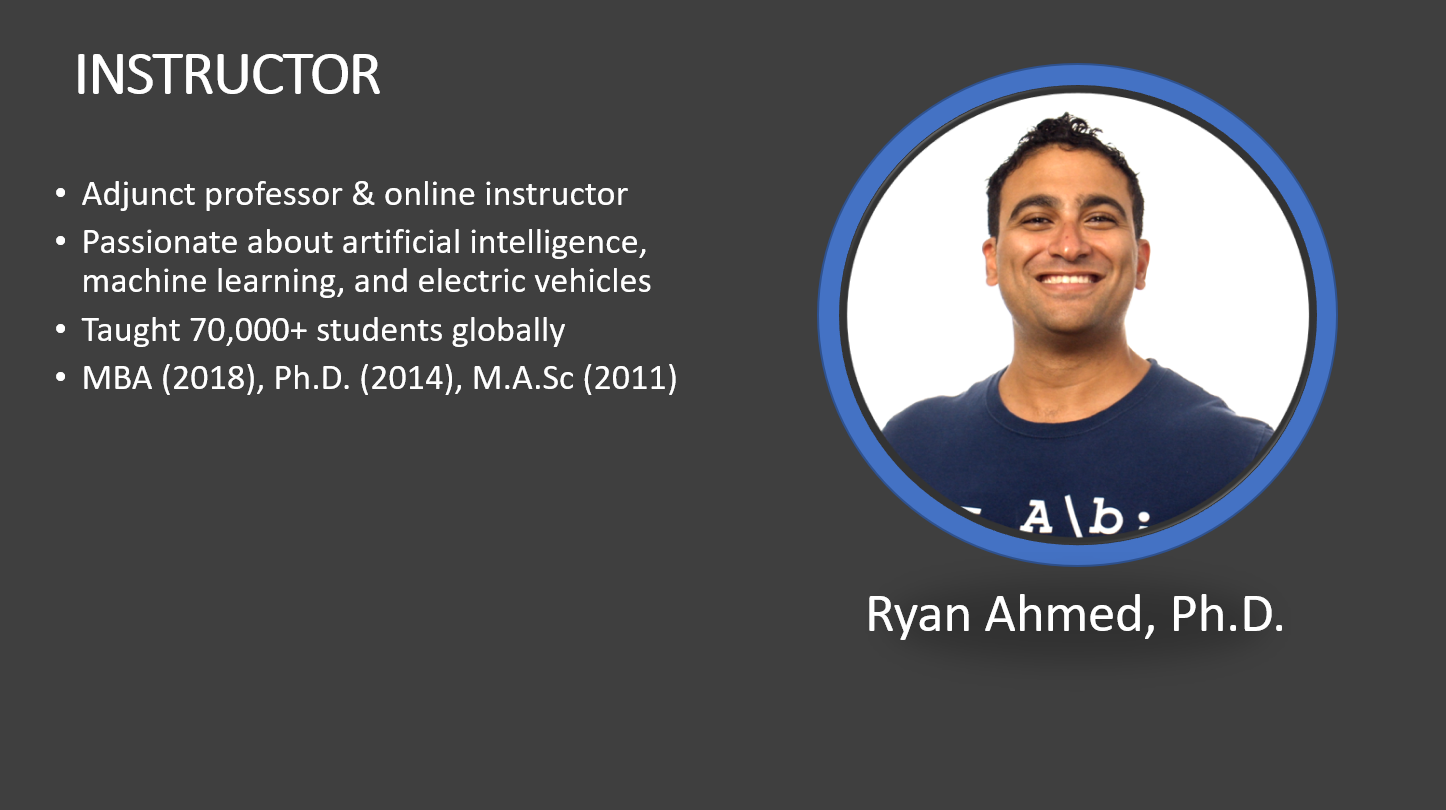

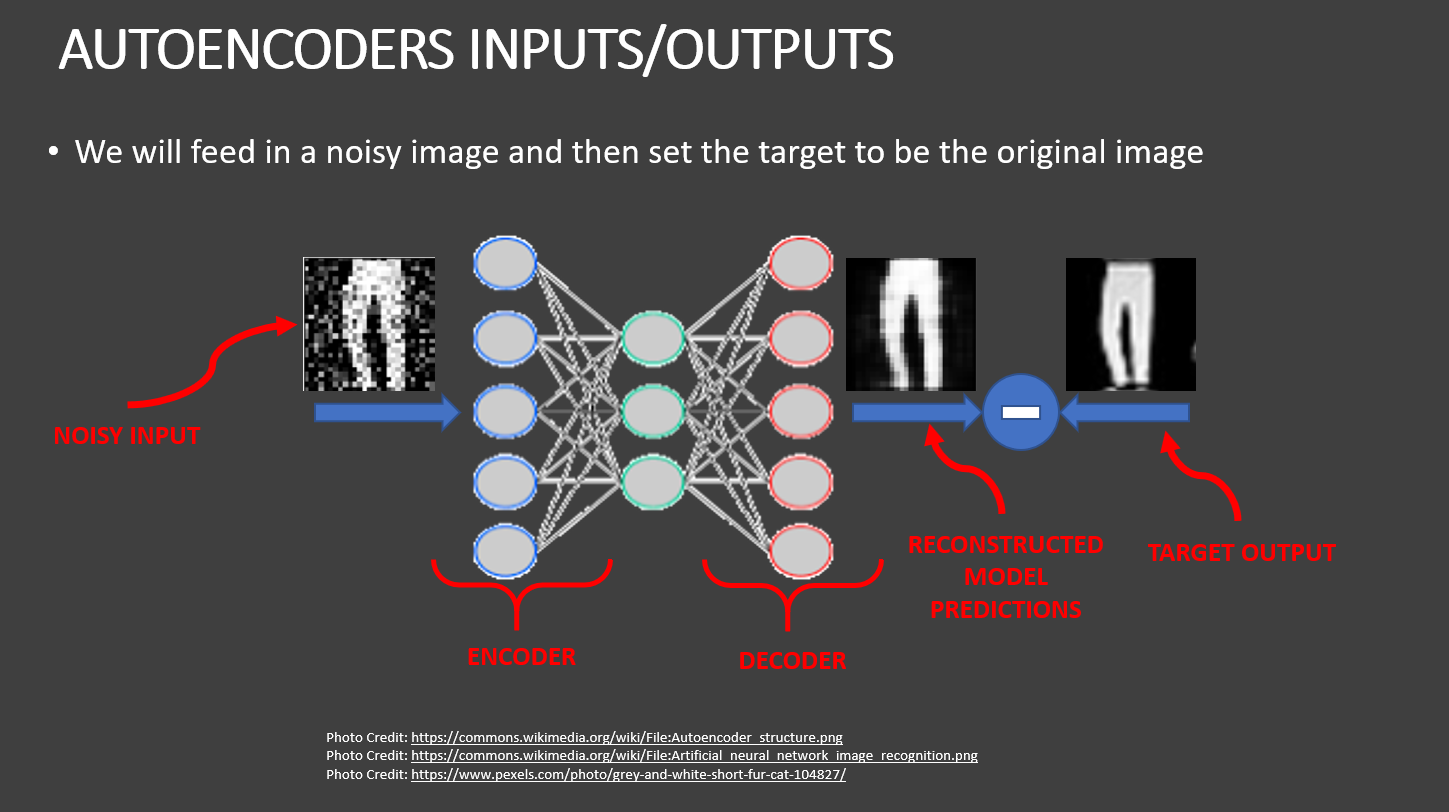

# TASK #2: IMPORT LIBRARIES AND DATASET

In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [18]:
# Load dataset 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

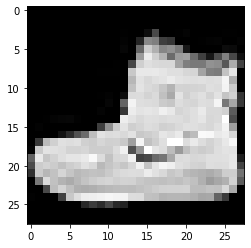

In [19]:
# Visualize a sample image
plt.imshow(X_train[0], cmap = 'gray')

In [20]:
# check out the shape of the training data
size_of_training_set = X_train.shape
print("Size of training set: " + str(size_of_training_set))

Size of training set: (60000, 28, 28)


In [23]:
# check out the shape of the testing data
size_of_testing_set = X_test.shape
print("Size of testing set: " + str(size_of_testing_set))

Size of testing set: (10000, 28, 28)


# TASK #3: PERFORM DATA VISUALIZATION

In [39]:
# Let's view some images!
i = random.randint(1, 60e3)

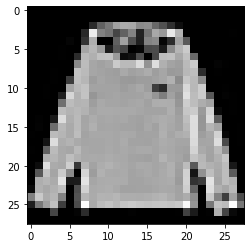

In [40]:
plt.imshow(X_train[i], cmap = "gray")

In [41]:
label = y_train[i]
print("Label of the " + str(i) +"th random image: " + str(label))

Label of the 24372th random image: 2


In [48]:
def plot_random_images_from_set(dataset, labels, W_grid = 10, L_grid = 10):
    # Let's view more images in a grid format
    # Define the dimensions of the plot grid 
    
    # fig, axes = plt.subplots(L_grid, W_grid)
    # subplot return the figure object and axes object
    # we can use the axes object to plot specific figures at various locations

    fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

    axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

    n_training = len(dataset) # get the length of the training dataset

    # Select a random number from 0 to n_training
    for i in range(W_grid*L_grid):
        index = np.random.randint(0, n_training)
        axes[i].imshow(dataset[index], cmap = 'gray')
        axes[i].set_title(labels[index], fontsize = 8)
        axes[i].axis('off')


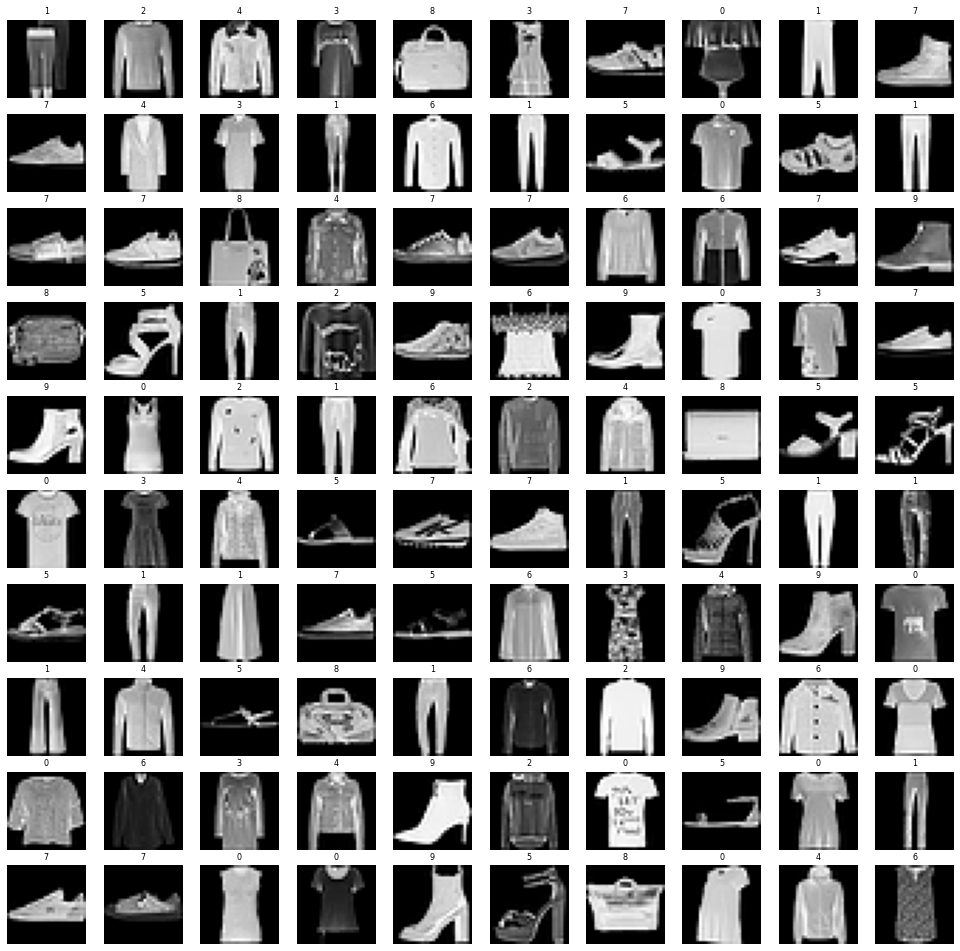

In [49]:
plot_random_images_from_set(X_train, y_train)

# TASK #4: PERFORM DATA PREPROCESSING

In [45]:
# normalize data
X_train = X_train / 255
X_test = X_test / 255

In [46]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [93]:
# add some noise
def add_noise_to_dataset(dataset, noise_factor = 0.3):
    noise_factor = 0.3
    noisy_dataset = []
    for img in dataset:
        noisy_img = img + noise_factor * np.random.randn(*img.shape)
        noisy_img = np.clip(noisy_img, 0, 1)
        noisy_dataset.append(noisy_img)
    return noisy_dataset

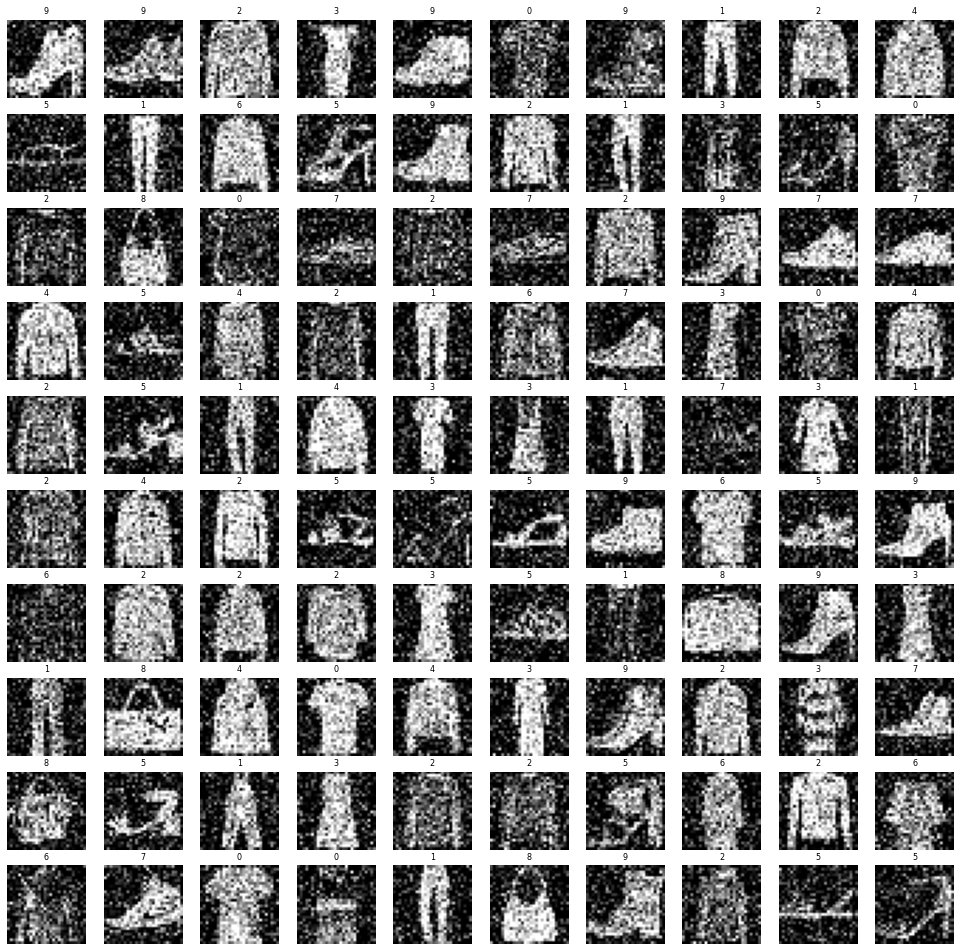

In [94]:
noisy_X_train = np.array(add_noise_to_dataset(X_train))
plot_random_images_from_set(noisy_X_train, y_train)

In [95]:
# add noise to testing dataset
noisy_X_test = np.array(add_noise_to_dataset(X_test, 0.1))

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

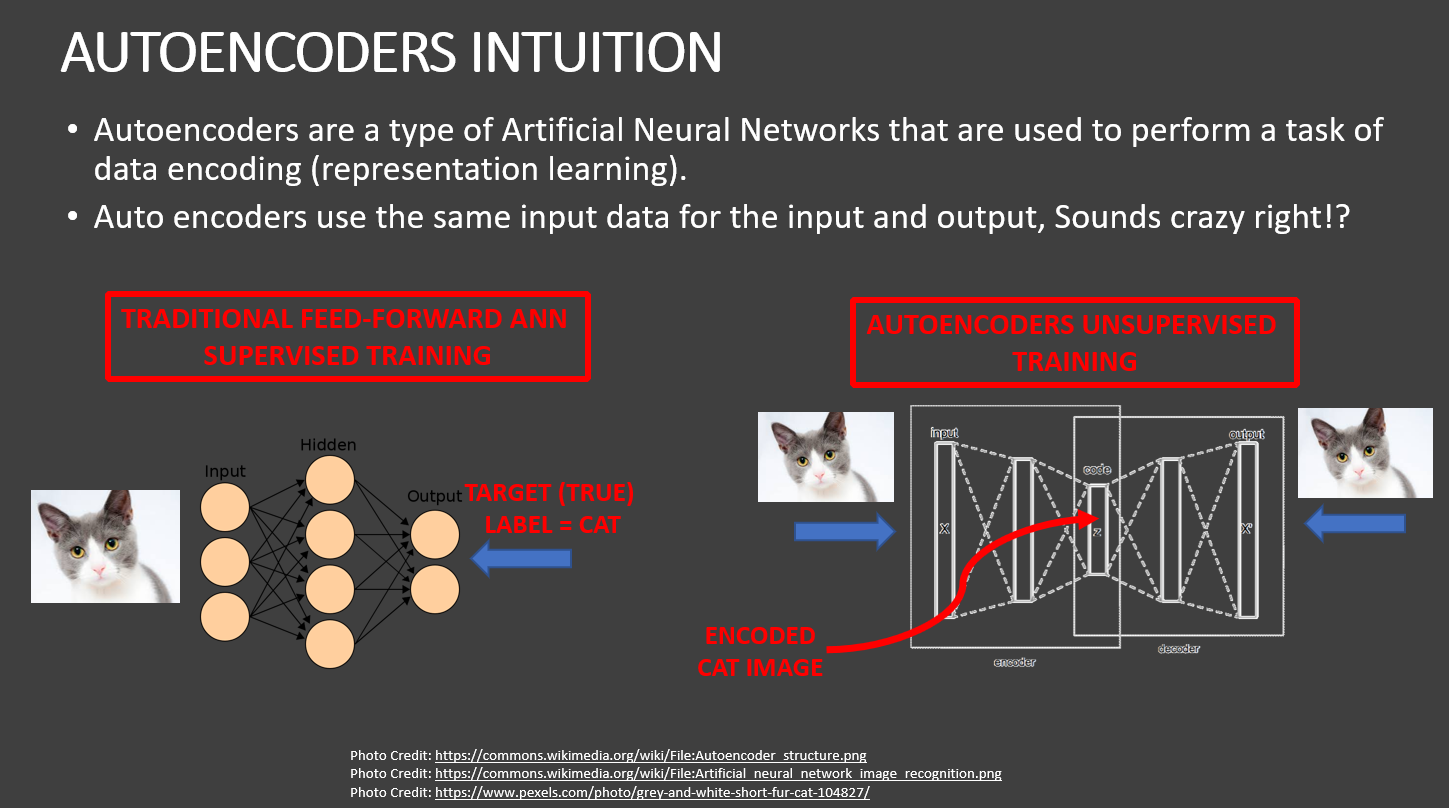

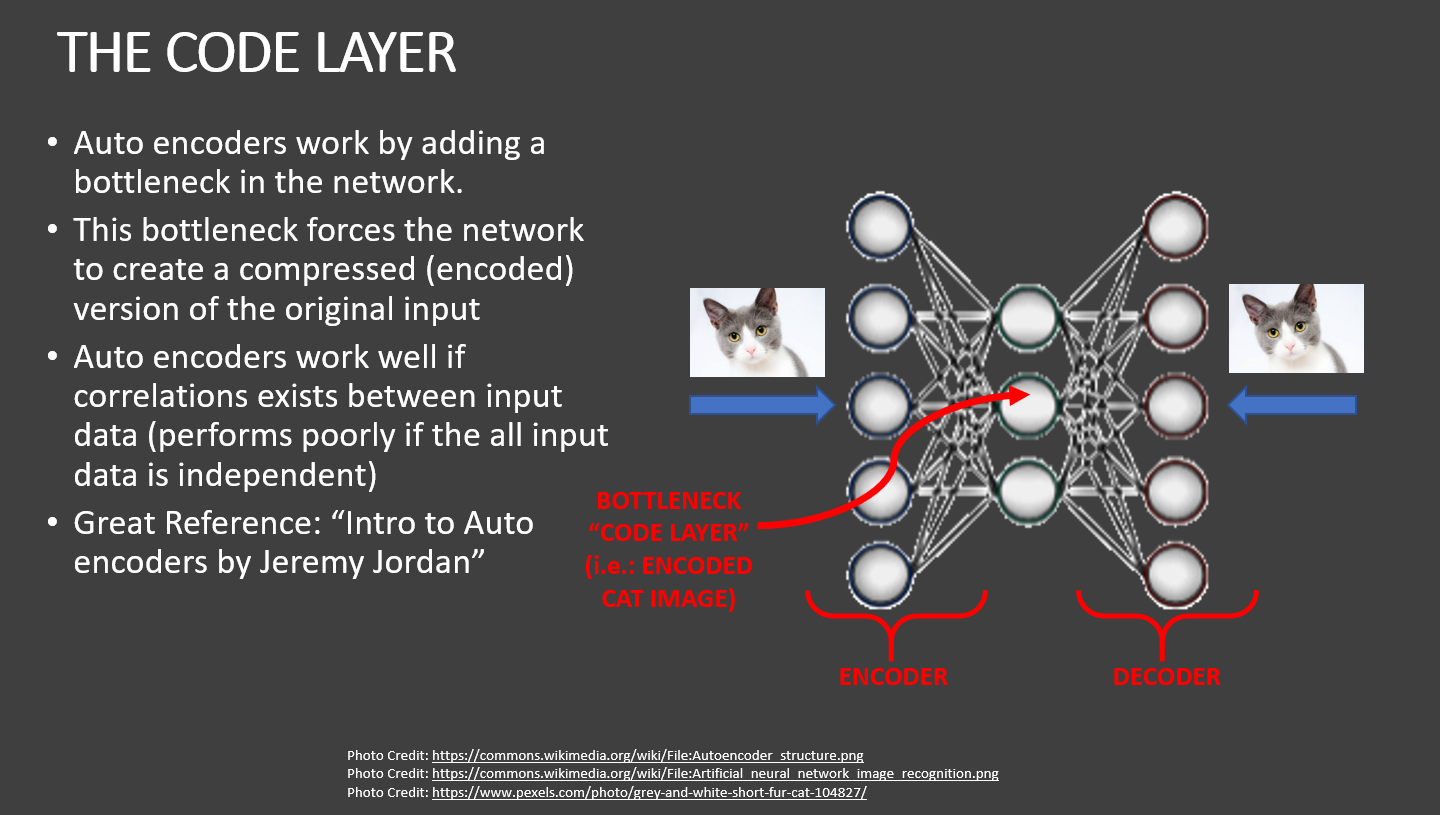

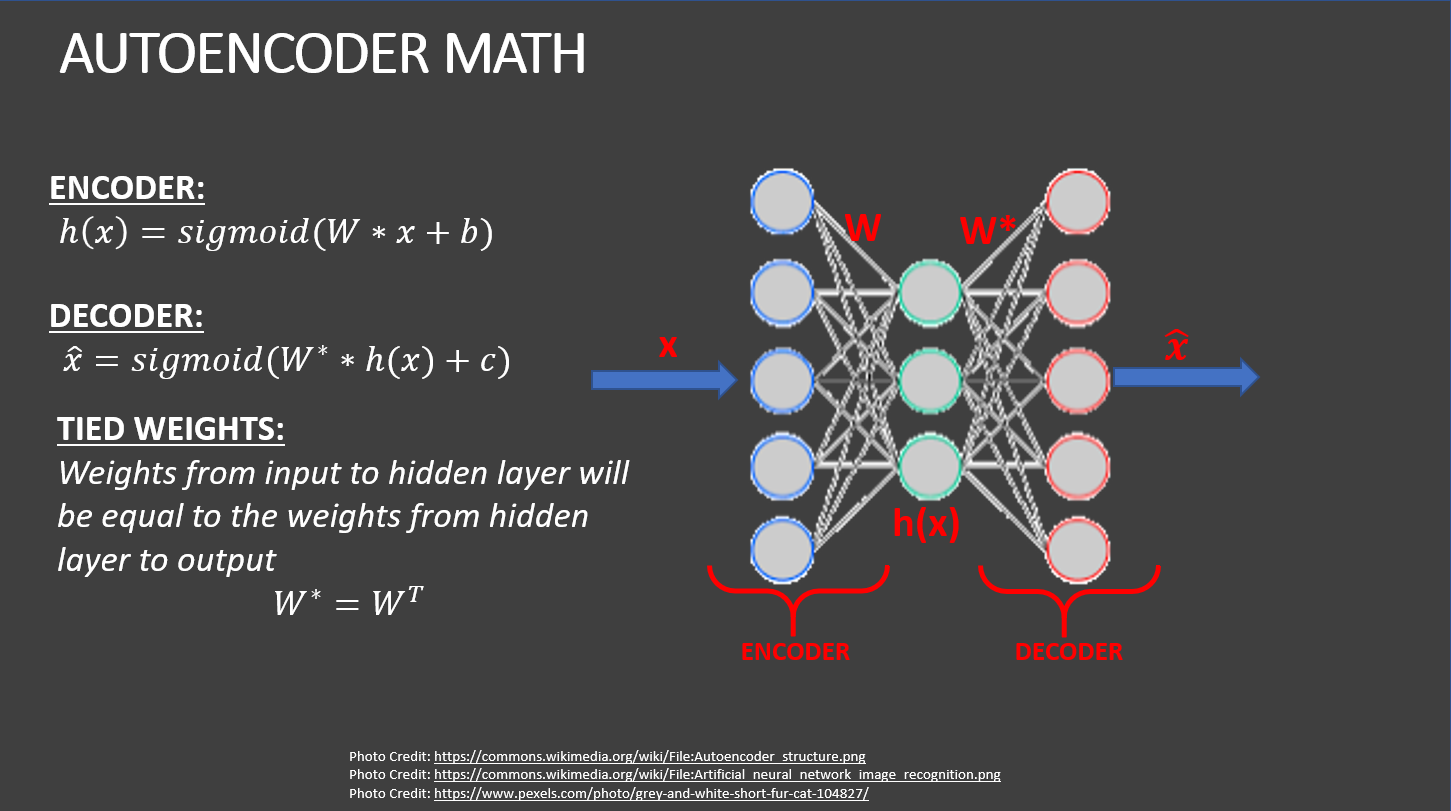

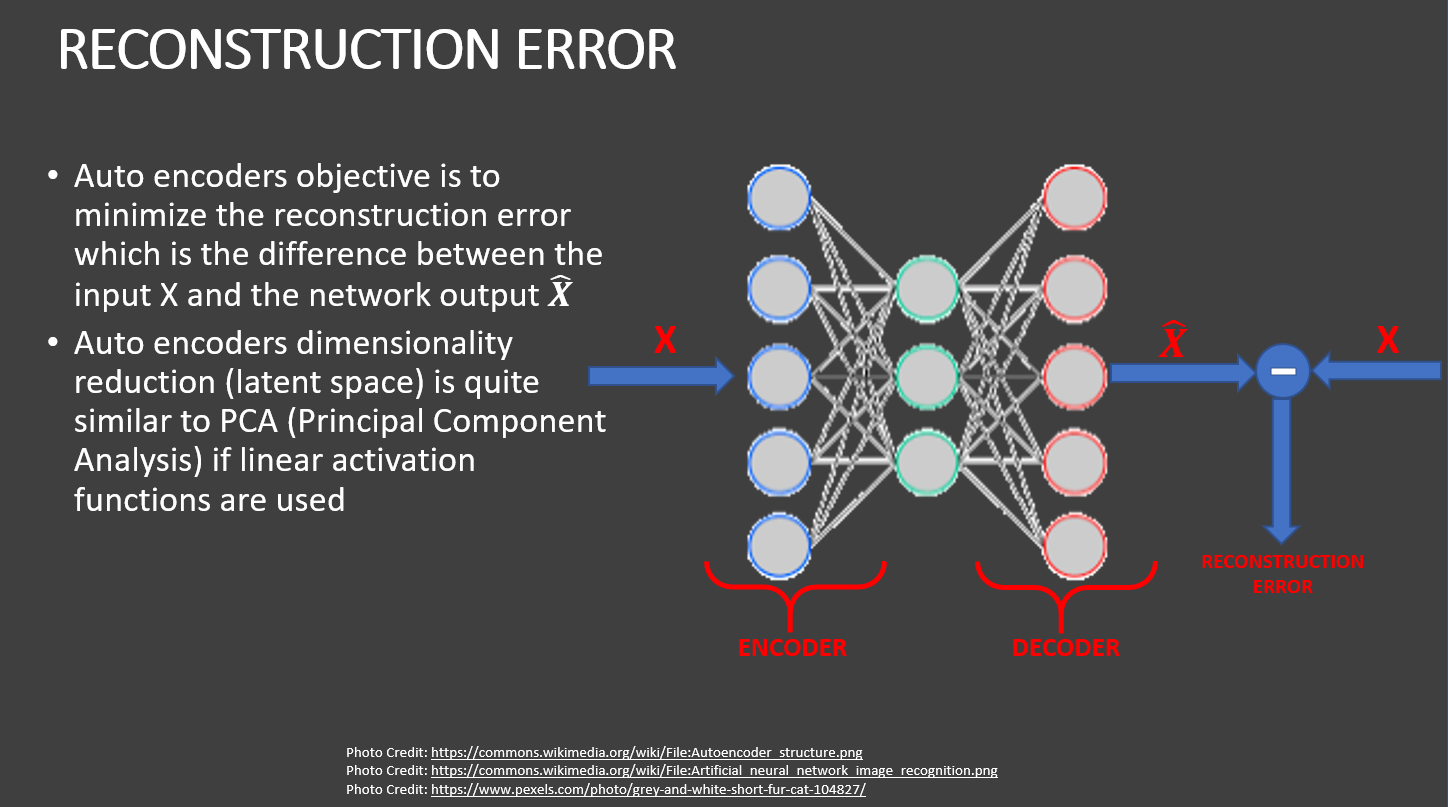

# TASK #6: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [96]:
autoencoder = tf.keras.models.Sequential()

# encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same', 
                                      input_shape = (28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same'))

# decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, 
                                                padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, 
                                                padding = 'same', activation = 'sigmoid'))

In [97]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [98]:
print(noisy_X_train.shape)
print(X_train.shape)
autoencoder.fit(noisy_X_train.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noisy_X_test.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

(60000, 28, 28)
(60000, 28, 28)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 32s 536us/sample - loss: 0.3947 - val_loss: 0.3271
Epoch 2/10
60000/60000 [==============================] - 28s 472us/sample - loss: 0.3173 - val_loss: 0.3142
Epoch 3/10
60000/60000 [==============================] - 29s 483us/sample - loss: 0.3095 - val_loss: 0.3101
Epoch 4/10
60000/60000 [==============================] - 29s 485us/sample - loss: 0.3063 - val_loss: 0.3074
Epoch 5/10
60000/60000 [==============================] - 29s 484us/sample - loss: 0.3045 - val_loss: 0.3062
Epoch 6/10
60000/60000 [==============================] - 29s 485us/sample - loss: 0.3035 - val_loss: 0.3054
Epoch 7/10
60000/60000 [==============================] - 30s 493us/sample - loss: 0.3028 - val_loss: 0.3047
Epoch 8/10
60000/60000 [==============================] - 29s 489us/sample - loss: 0.3022 - val_loss: 0.3041
Epoch 9/10
60000/60000 [======================

# TASK #7: EVALUATE TRAINED MODEL PERFORMANCE

In [100]:
evaluation = autoencoder.evaluate(noisy_X_test.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print("Test Accuracy: {:.3f}".format(evaluation))

10000/10000 [==============================] - 3s 260us/sample - loss: 0.3029
Test Accuracy: 0.303


In [101]:
predicted = autoencoder.predict(noisy_X_test[:10].reshape(-1, 28, 28, 1))

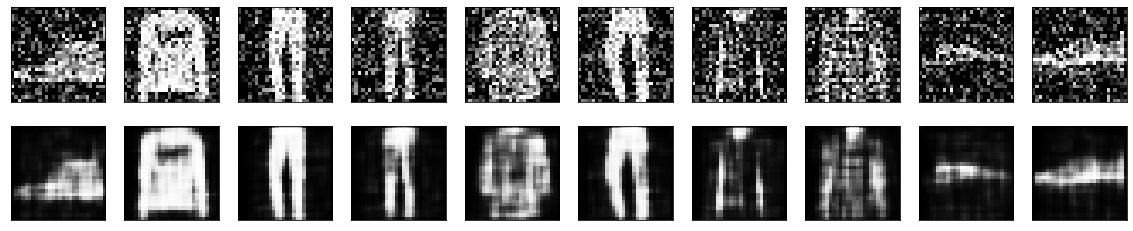

In [103]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noisy_X_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot